In [3]:
import os
import torch
from pydiffres import DiffRes

# =========> Assume you have already got a spectrogram (better in log-scale)
# The spectrogram data: [Batchsize, T-steps, F-bins]
data = torch.randn(1, 3000, 128)  

model = DiffRes(
    in_t_dim=3000, # The temporal dimension of your spectrogram
    in_f_dim=128, # The frequency dimension of your spectrogram
    dimension_reduction_rate=0.75, # How much temporal dimension to remove
    learn_pos_emb=False # If you like to make the resolution encoding learnable
)


# Use DiffRes to compress the temporal dimension
# fix-resolution/hopsize Spectrogram ===========> compressed spectrogram
ret = model(data)

# 1. Add this to your loss function: ret["guide_loss"].
# 2. Use this for classification: ret["feature"].
# 3. Alternatively, you can also use ret["avgpool"] or ret["maxpool] classification with/without ret["resolution_enc"] for classification.

In [13]:
import pandas as pd

df = pd.read_csv('../Project_Akhir/ESC-50-master/meta/esc50.csv')
df['target'].value_counts()

target
0     40
14    40
36    40
19    40
30    40
34    40
9     40
22    40
48    40
41    40
47    40
31    40
17    40
45    40
8     40
15    40
46    40
37    40
32    40
16    40
25    40
4     40
3     40
27    40
43    40
12    40
40    40
29    40
10    40
7     40
26    40
6     40
44    40
23    40
20    40
49    40
24    40
39    40
28    40
18    40
2     40
35    40
38    40
21    40
1     40
11    40
42    40
5     40
33    40
13    40
Name: count, dtype: int64

In [4]:
import librosa
import torch

# Load audio
y, sr = librosa.load("../Project_Akhir/ESC-50-master/audio/1-137-A-32.wav", sr=16000)

# Buat mel-spectrogram (keyword-only args)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=256, n_mels=128)

# Log scale
log_mel_spec = librosa.power_to_db(mel_spec)

# Jadi tensor: [batch, t-steps, f-bins]
data = torch.tensor(log_mel_spec.T).unsqueeze(0)  # shape: [1, time, 128]

print(data.shape)


torch.Size([1, 313, 128])


In [5]:
from pydiffres import DiffRes

# Inisialisasi model
model = DiffRes(
    in_t_dim=data.shape[1],   # jumlah time steps
    in_f_dim=data.shape[2],   # jumlah frequency bins (128)
    dimension_reduction_rate=0.75,
    learn_pos_emb=False
)

# Forward pass
ret = model(data)


In [6]:
model.visualize(ret, savepath="./visuals")

In [10]:
ret["feature"].shape

torch.Size([1, 3, 78, 128])

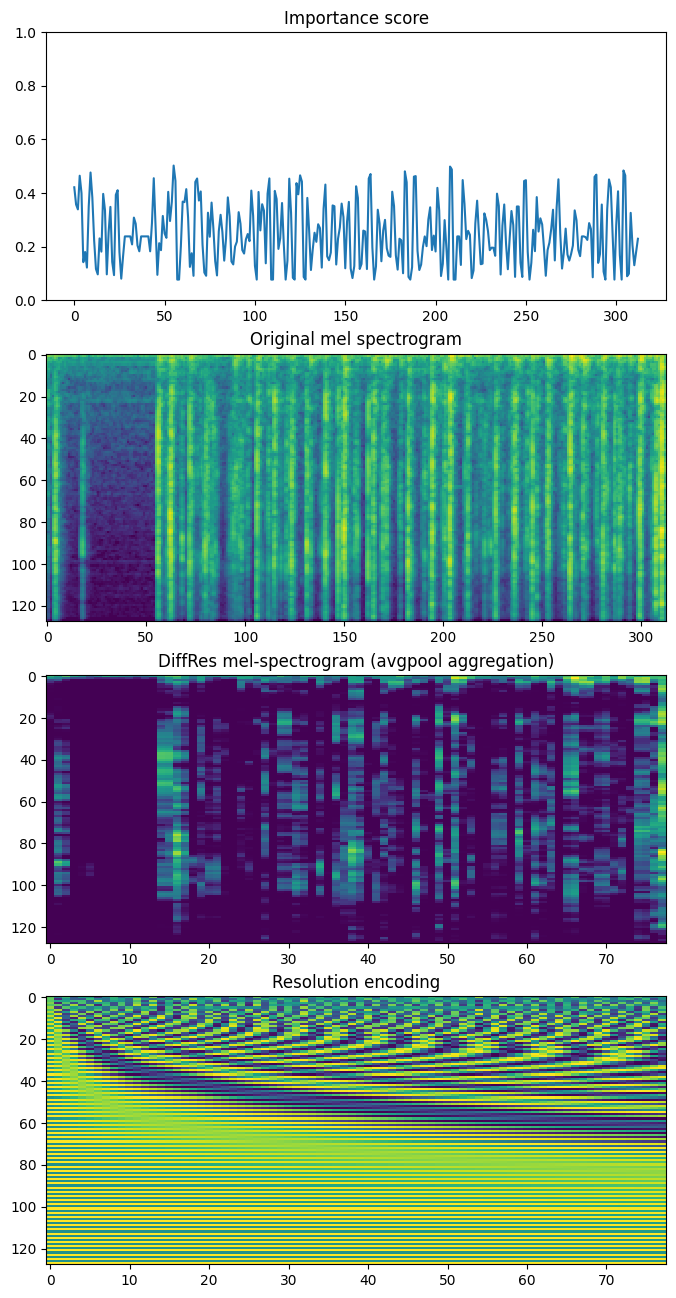

In [8]:
import matplotlib.pyplot as plt

ret = model(data)

x, y, emb, score = ret["x"], ret["feature"], ret["resolution_enc"], ret["score"]
y = y[:, 0, :, :]

for i in range(min(10, x.size(0))):  # maksimal 10 gambar
    plt.figure(figsize=(8, 16))
    
    plt.subplot(411)
    plt.title("Importance score")
    plt.plot(score[i, :, 0].detach().cpu().numpy())
    plt.ylim([0,1])
    
    plt.subplot(412)
    plt.title("Original mel spectrogram")
    plt.imshow(x[i, ...].detach().cpu().numpy().T, aspect="auto", interpolation="none")
    
    plt.subplot(413)
    plt.title("DiffRes mel-spectrogram (avgpool aggregation)")
    plt.imshow(y[i, ...].detach().cpu().numpy().T, aspect="auto", interpolation="none")
    
    plt.subplot(414)
    plt.title("Resolution encoding")
    plt.imshow(emb[i, ...].detach().cpu().numpy().T, aspect="auto", interpolation="none")
    
    plt.show()  


In [9]:
features = ret["feature"]  # [batch, 3, T', F]
features

tensor([[[[-1.0398e+01, -1.4664e+01, -2.1981e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          [-1.2598e+01, -1.6356e+01, -2.0450e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          [-8.9827e+00, -1.8624e+01, -2.6067e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          ...,
          [-1.1066e+01, -5.3703e+00, -6.2140e+00,  ..., -2.3500e+01,
           -2.6718e+01, -2.7631e+01],
          [-9.7103e+00, -9.9148e+00, -1.5921e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          [-1.0137e+01, -9.2640e+00, -1.1022e+01,  ..., -2.7293e+01,
           -2.5239e+01, -2.7602e+01]],

         [[-9.5823e+00, -1.3493e+01, -2.0622e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          [-1.1461e+01, -1.5000e+01, -1.9070e+01,  ..., -2.7629e+01,
           -2.7631e+01, -2.7631e+01],
          [-8.0218e+00, -1.7830e+01, -2.4869e+01,  ..., -2.7631e+01,
           -2.7631e+01, -2.7631e+01],
          ...,
     